In [10]:
pip install pandas matplotlib

Average parking occupancy rates by district:
District
SULTANGAZİ       100.000000
GAZİOSMANPAŞA    100.000000
ESENLER           86.748045
ARNAVUTKÖY        81.000000
KÜÇÜKÇEKMECE      74.017599
BAYRAMPAŞA        73.777296
BAĞCILAR          69.754982
ÇEKMEKÖY          66.857143
BEYOĞLU           64.058025
BEŞİKTAŞ          63.757124
BAHÇELİEVLER      60.186029
GÜNGÖREN          54.640909
BÜYÜKÇEKMECE      54.242018
KAĞITHANE         51.967449
FATİH             51.936757
ŞİŞLİ             51.382713
KADIKÖY           51.296428
ÜSKÜDAR           51.236460
PENDİK            49.700780
ÜMRANİYE          48.720783
ZEYTİNBURNU       47.722857
SULTANBEYLİ       47.423077
EYÜP              43.153173
KARTAL            42.170970
ATAŞEHİR          41.052679
SİLİVRİ           39.117647
SARIYER           39.065536
BEYLİKDÜZÜ        37.464286
MALTEPE           31.831698
BAKIRKÖY          31.532780
BEYKOZ            25.027111
AVCILAR           22.060185
TUZLA             15.097581
BAŞAKŞEHİR         8.2

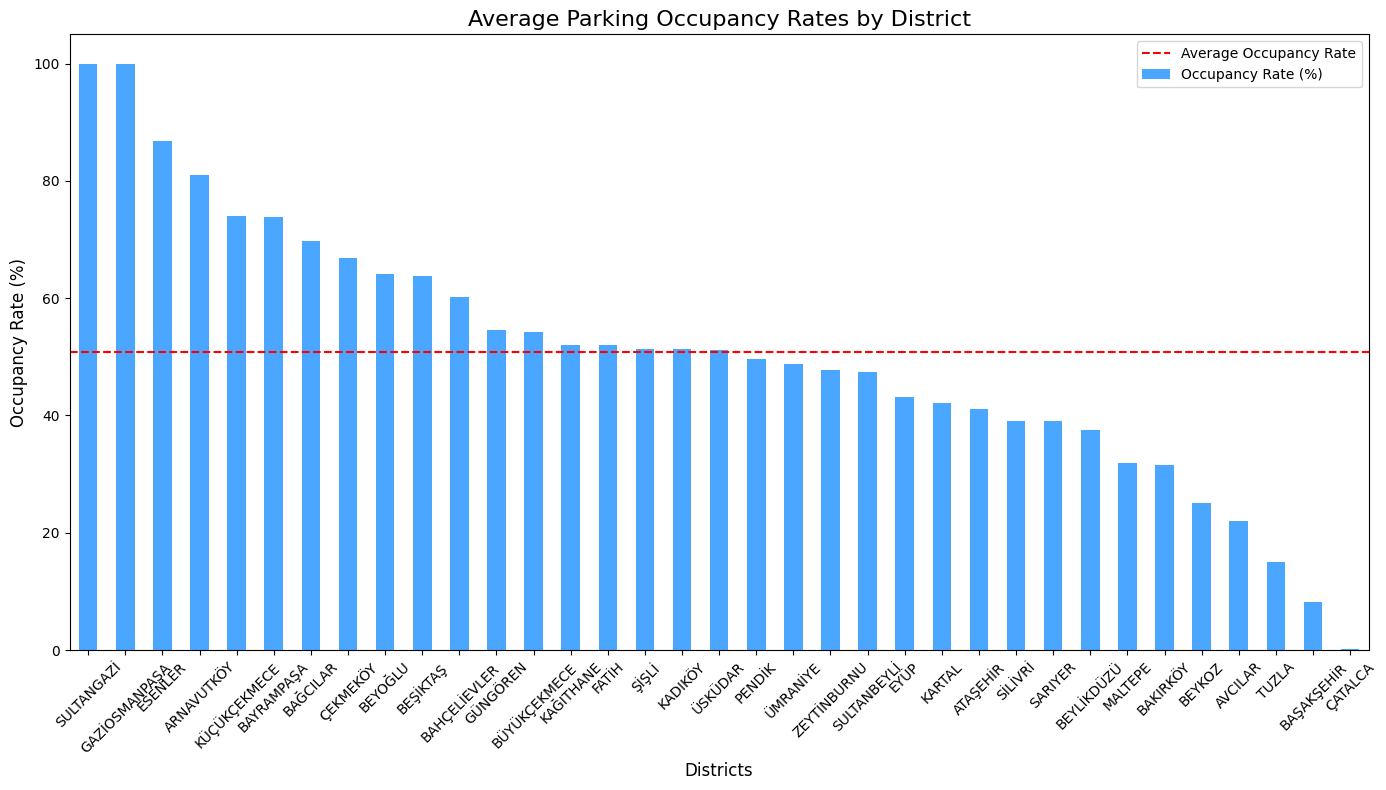

In [14]:
# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API URL
api_url = "https://api.ibb.gov.tr/ispark/Park"

# Function to fetch ISPAK parking data from the API
def fetch_ispark_data(api_url):
    try:
        # Make a GET request to the API
        response = requests.get(api_url)
        if response.status_code == 200:
            return response.json()  # Returns data in JSON format
        else:
            print(f"API request failed. Status code: {response.status_code}")
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Fetch data from the API
api_data = fetch_ispark_data(api_url)

if api_data:
    # Convert the JSON data into a DataFrame
    df = pd.DataFrame(api_data)

    # Rename the columns for better readability
    df = df.rename(columns={
        "parkName": "Park Name",
        "district": "District",
        "capacity": "Total Capacity",
        "emptyCapacity": "Empty Capacity",
        "parkType": "Park Type",
        "workHours": "Work Hours",
        "isOpen": "Open Status"
    })

    # Calculate the occupancy rate
    df["Occupancy Rate (%)"] = ((df["Total Capacity"] - df["Empty Capacity"]) / df["Total Capacity"]) * 100

    # Handle potential negative values in occupancy rate
    df["Occupancy Rate (%)"] = df["Occupancy Rate (%)"].clip(lower=0)

    # Calculate average occupancy rates by district
    district_occupancy = df.groupby("District")["Occupancy Rate (%)"].mean().sort_values(ascending=False)

    # Print the results
    print("Average parking occupancy rates by district:")
    print(district_occupancy)

    # Visualization
    plt.figure(figsize=(14, 8))  # Increased figure size for better readability
    district_occupancy.plot(kind="bar", color="dodgerblue", alpha=0.8)
    plt.title("Average Parking Occupancy Rates by District", fontsize=16)
    plt.xlabel("Districts", fontsize=12)
    plt.ylabel("Occupancy Rate (%)", fontsize=12)
    plt.axhline(y=district_occupancy.mean(), color="red", linestyle="--", label="Average Occupancy Rate")
    plt.legend()
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()
else:
    print("Data could not be retrieved from the API.")

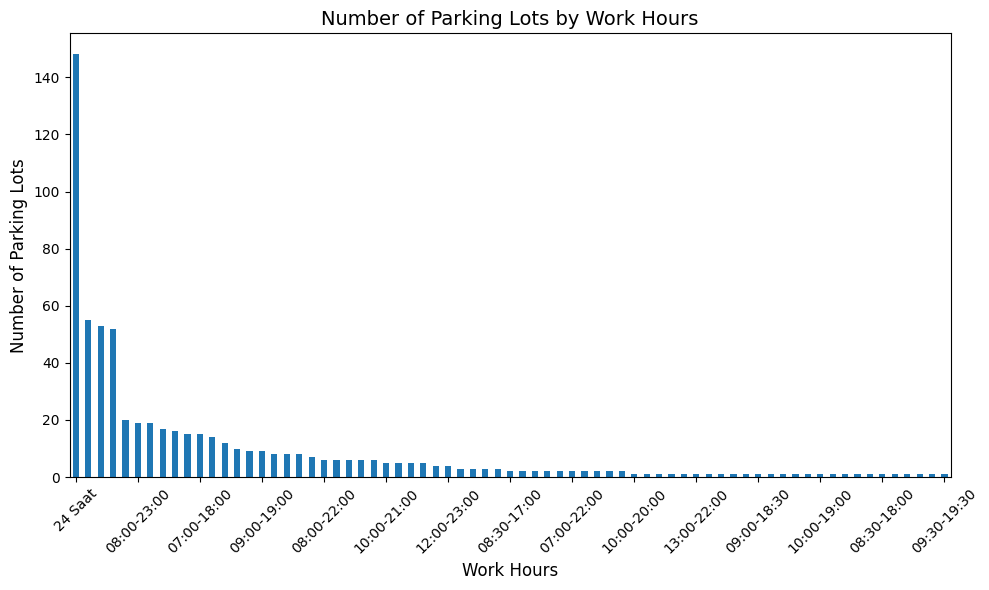

In [15]:
# Visualization: Number of Parking Lots by Work Hours
# Count the occurrences of each work hour range and plot as a bar chart
df["Work Hours"].value_counts().plot(kind="bar", figsize=(10, 6))

# Add a title and axis labels to the plot
plt.title("Number of Parking Lots by Work Hours", fontsize=14)
plt.xlabel("Work Hours", fontsize=12)
plt.ylabel("Number of Parking Lots", fontsize=12)

# Adjust x-axis labels for better readability by showing fewer labels
plt.xticks(ticks=range(0, len(df["Work Hours"].value_counts()), 5), rotation=45, fontsize=10)

# Optimize layout to prevent overlapping of plot elements
plt.tight_layout()

# Display the plot
plt.show()

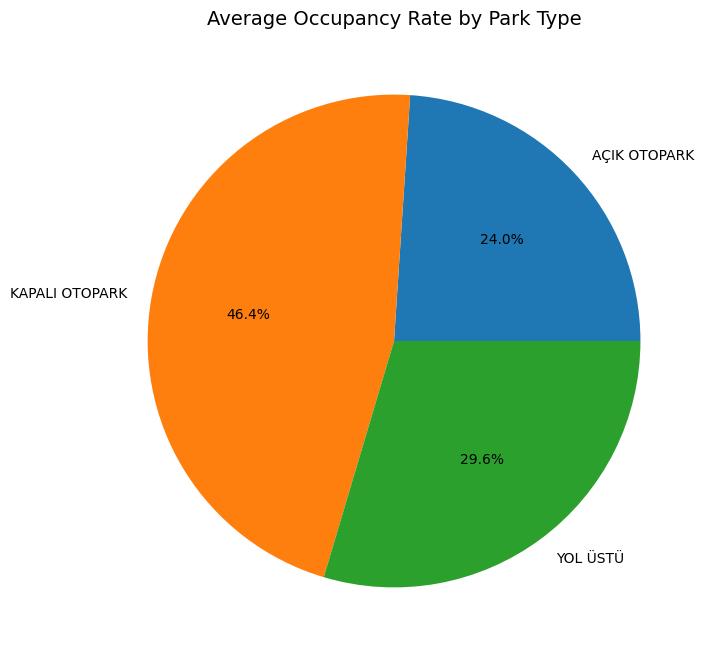

In [16]:
# Calculate the average occupancy rate by Park Type
# Group the data by "Park Type" and calculate the mean of "Occupancy Rate (%)"
park_type_occupancy = df.groupby("Park Type")["Occupancy Rate (%)"].mean()

# Filter out any negative or unrealistic values for accurate visualization
park_type_occupancy = park_type_occupancy[park_type_occupancy >= 0]

# Plot the data as a pie chart
park_type_occupancy.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8))

# Add a title to the chart
plt.title("Average Occupancy Rate by Park Type", fontsize=14)

# Remove the y-axis label for cleaner visualization
plt.ylabel("")

# Display the plot
plt.show()

In [17]:
# Identify the top 10 busiest parking lots based on occupancy rate
# Sort the data by "Occupancy Rate (%)" in descending order and select the top 10
top_busy_parks = df.sort_values(by="Occupancy Rate (%)", ascending=False).head(10)

# Print the top 10 busiest parking lots
print("Top 10 Busiest Parking Lots:")
print(top_busy_parks[["Park Name", "District", "Occupancy Rate (%)"]])

Top 10 Busiest Parking Lots:
                                        Park Name      District  \
0              1293 Yavuz Selim Otomatik Otoparkı         FATİH   
231                              Eski Salı Pazarı       KADIKÖY   
571                       Ulu Camii Açık Otoparkı  BAHÇELİEVLER   
225     Esenler Adem Baştürk Kültür Merkezi Katlı       ESENLER   
40   Ataköy Metro Durağı Yanı Zemin Altı Otoparkı      BAKIRKÖY   
495                        Refik Saydam Caddesi 3       BEYOĞLU   
197                                 Damla Sokak 1         ŞİŞLİ   
194                       Çırpıcı Sosyal Tesisler   ZEYTİNBURNU   
190                       Çengelköy Açık Otoparkı       ÜSKÜDAR   
189                       Çeliktepe Açık Otoparkı     KAĞITHANE   

     Occupancy Rate (%)  
0                 100.0  
231               100.0  
571               100.0  
225               100.0  
40                100.0  
495               100.0  
197               100.0  
194               100.0  

In [18]:
import folium

# Create a map centered on Istanbul
# Setting the initial location and zoom level
istanbul_map = folium.Map(location=[41.0082, 28.9784], zoom_start=12)

# Add parking lots as markers on the map
for _, row in df.iterrows():
    folium.Marker(
        location=[float(row["lat"]), float(row["lng"])],  # Latitude and longitude of the parking lot
        popup=f"{row['Park Name']}<br>Occupancy Rate: {row['Occupancy Rate (%)']:.2f}%",  # Popup information
        icon=folium.Icon(color="blue", icon="info-sign")  # Marker style
    ).add_to(istanbul_map)

# Save the map to an HTML file and display the message
istanbul_map.save("parking_map.html")
print("Map has been saved as: parking_map.html")

Map has been saved as: parking_map.html


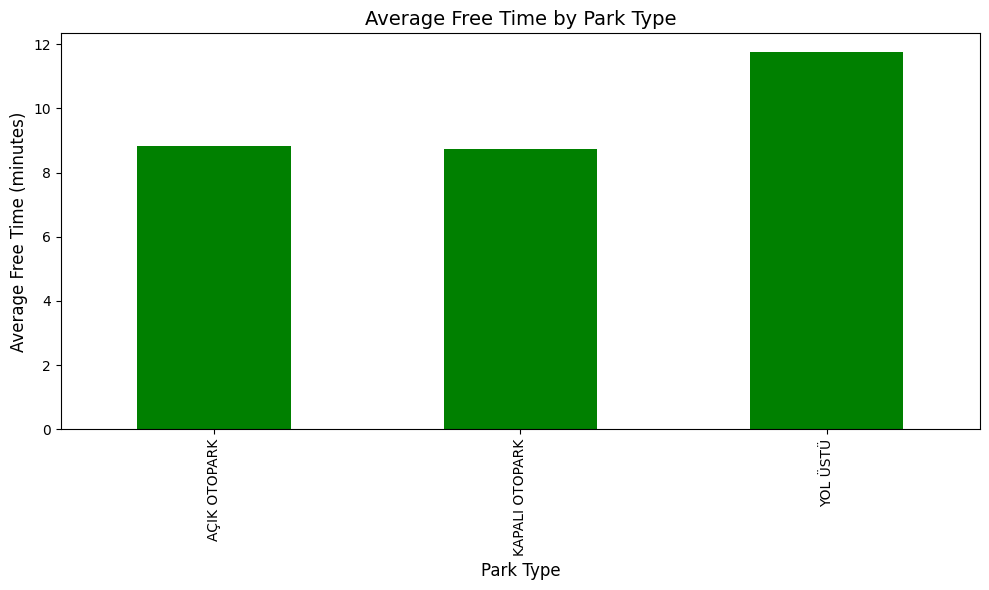

In [19]:
# Analyze the average free time by park type
# Group the data by "Park Type" and calculate the mean of the "freeTime" column
free_time_analysis = df.groupby("Park Type")["freeTime"].mean()

# Visualization: Average Free Time by Park Type
# Create a bar chart to display the average free time for each park type
free_time_analysis.plot(kind="bar", figsize=(10, 6), color="green")

# Add a title and axis labels
plt.title("Average Free Time by Park Type", fontsize=14)
plt.xlabel("Park Type", fontsize=12)
plt.ylabel("Average Free Time (minutes)", fontsize=12)

# Optimize layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

In [20]:
import numpy as np

# Base price (fixed starting price)
base_price = 5

# Dynamic pricing function
def dynamic_pricing(row):
    # Effect of occupancy
    if row["Occupancy Rate (%)"] < 50:
        occupancy_effect = 0.0  # Low occupancy
    elif 50 <= row["Occupancy Rate (%)"] < 80:
        occupancy_effect = 0.2  # Medium occupancy
    else:
        occupancy_effect = 0.5  # High occupancy

    # Hourly demand factor
    work_hours = row["Work Hours"]
    if "08:00-10:00" in work_hours or "17:00-19:00" in work_hours:
        time_factor = 0.3  # Peak hours
    else:
        time_factor = 0.1  # Normal hours

    # Location factor (e.g., additional charges for popular districts)
    if row["District"] in ["BEŞİKTAŞ", "KADIKÖY", "BAKIRKÖY"]:
        location_factor = 0.2
    else:
        location_factor = 0.0

    # Calculate the final price
    price = base_price * (1 + occupancy_effect) * (1 + time_factor) * (1 + location_factor)
    return round(price, 2)

# Add a new column for dynamic pricing
df["Dynamic Price (₺)"] = df.apply(dynamic_pricing, axis=1)

# Display the results
print(df[["Park Name", "Occupancy Rate (%)", "Work Hours", "District", "Dynamic Price (₺)"]].head(10))

                                       Park Name  Occupancy Rate (%)  \
0             1293 Yavuz Selim Otomatik Otoparkı          100.000000   
1  15 Temmuz Şehitler Meydanı Zeminaltı Otoparkı           87.172012   
2                                  19 Mayıs Açık          100.000000   
3                      4.Levent PD Açık Otoparkı           65.254237   
4                     Abide-i Hürriyet Caddesi 2           36.666667   
5                     Abide-i Hürriyet Caddesi 5           37.500000   
6                     Abide-i Hürriyet Caddesi 6           42.500000   
7                     Abide-i Hürriyet Caddesi 7           52.500000   
8                         Acıbadem Açık Otoparkı            9.000000   
9                   Acıbadem Yol Üstü Otoparkı 1           38.000000   

    Work Hours   District  Dynamic Price (₺)  
0      24 Saat      FATİH               8.25  
1      24 Saat   ÜMRANİYE               8.25  
2      24 Saat      ŞİŞLİ               8.25  
3      24 Saat  KAĞ

Mean Absolute Error (MAE): 21.699963295724118
R² Score: 0.1363103582739481


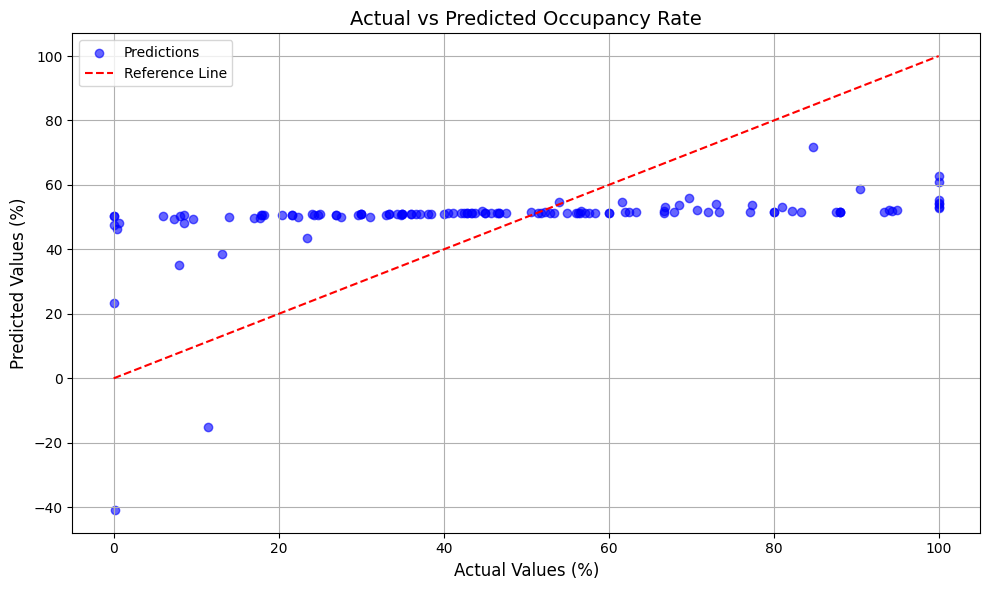

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Define independent (X) and dependent (y) variables
# X contains "Total Capacity" and "Empty Capacity" as predictors
# y is the "Occupancy Rate (%)" as the target variable
X = df[["Total Capacity", "Empty Capacity"]]
y = df["Occupancy Rate (%)"]

# Split the data into training and test sets
# 80% of the data is used for training, and 20% is used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Plot actual vs predicted occupancy rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predictions")
plt.plot([0, 100], [0, 100], "--", color="red", label="Reference Line")  # Reference line
plt.title("Actual vs Predicted Occupancy Rate", fontsize=14)
plt.xlabel("Actual Values (%)", fontsize=12)
plt.ylabel("Predicted Values (%)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

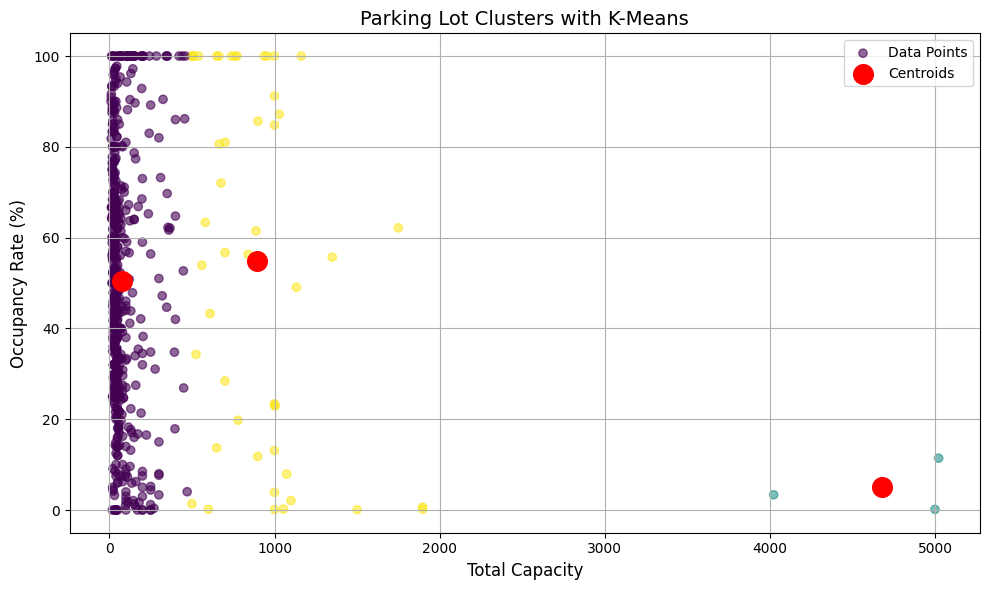

Cluster Analysis:
         Total Capacity  Occupancy Rate (%)
Cluster                                    
0             77.709343           50.454702
1           4681.666667            4.975138
2            893.040816           54.930481


In [22]:
from sklearn.cluster import KMeans

# Select data for clustering
# Using "Total Capacity" and "Occupancy Rate (%)" as features for clustering
kmeans_data = df[["Total Capacity", "Occupancy Rate (%)"]]

# Create and train the K-Means model
# Setting the number of clusters to 3
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(kmeans_data)  # Add cluster labels to the DataFrame

# Retrieve the cluster centroids
centroids = kmeans.cluster_centers_

# Visualization of clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Total Capacity"], df["Occupancy Rate (%)"], c=df["Cluster"], cmap="viridis", alpha=0.6, label="Data Points")
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c="red", label="Centroids")  # Mark centroids
plt.title("Parking Lot Clusters with K-Means", fontsize=14)
plt.xlabel("Total Capacity", fontsize=12)
plt.ylabel("Occupancy Rate (%)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Analyze clusters
# Calculate the average "Total Capacity" and "Occupancy Rate (%)" for each cluster
cluster_analysis = df.groupby("Cluster")[["Total Capacity", "Occupancy Rate (%)"]].mean()
print("Cluster Analysis:")
print(cluster_analysis)

Mean Absolute Error (MAE): 9.996731732572051
R² Score: 0.7924895291448748


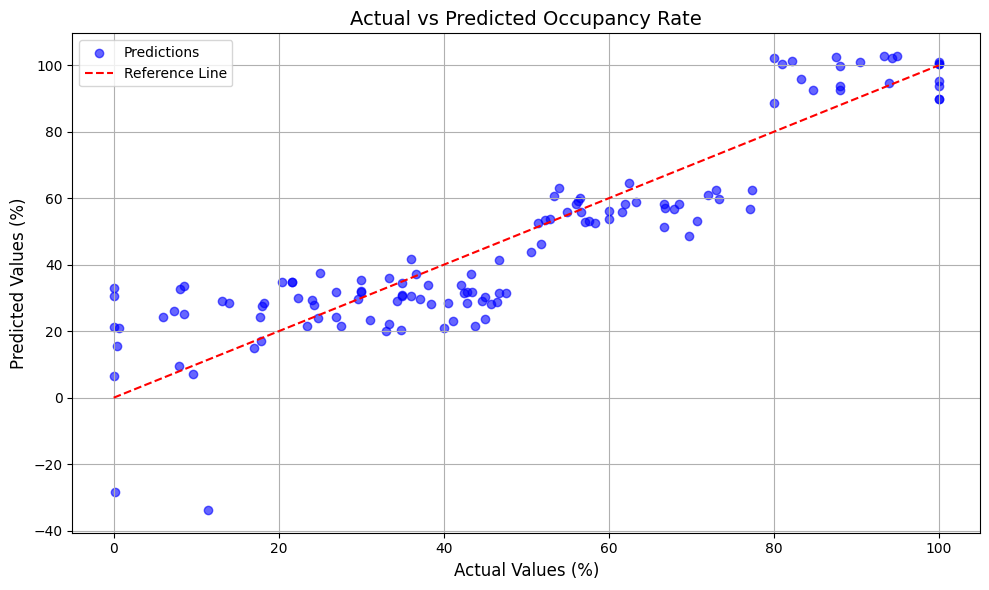

In [24]:
from sklearn.preprocessing import OneHotEncoder
import re

# Helper function to extract total hours from "Work Hours"
def extract_hours(work_hours):
    try:
        # Extract start and end times using regular expressions
        times = re.findall(r"(\d{2}):(\d{2})", work_hours)
        if len(times) == 2:
            start_hour = int(times[0][0]) + int(times[0][1]) / 60
            end_hour = int(times[1][0]) + int(times[1][1]) / 60
            return end_hour - start_hour  # Calculate total hours
        else:
            return 0  # Return 0 for invalid or missing data
    except:
        return 0  # Handle any exceptions and return 0

# Apply the helper function to create a new numerical column
df["Total Work Hours"] = df["Work Hours"].apply(extract_hours)

# Perform One-Hot Encoding for categorical variables
categorical_features = ["Park Type", "District"]
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Define independent (X) and dependent (y) variables
X = df_encoded.drop(["Occupancy Rate (%)", "Park Name", "Work Hours"], axis=1)
y = df_encoded["Occupancy Rate (%)"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display model evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Plot actual vs predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predictions")
plt.plot([0, 100], [0, 100], "--", color="red", label="Reference Line")
plt.title("Actual vs Predicted Occupancy Rate", fontsize=14)
plt.xlabel("Actual Values (%)", fontsize=12)
plt.ylabel("Predicted Values (%)", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
# n_estimators: Number of trees in the forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model using the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
# Calculate Mean Absolute Error (MAE) and R² Score
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Display the performance metrics
print("Random Forest Mean Absolute Error (MAE):", rf_mae)
print("Random Forest R² Score:", rf_r2)

Random Forest Mean Absolute Error (MAE): 5.873321575015108
Random Forest R² Score: 0.911211358468546


In [27]:
# Evaluate the performance of the Linear Regression model
# Calculate Mean Absolute Error (MAE) and R² Score for Linear Regression
lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

# Print the performance metrics for Linear Regression
print("Linear Regression Mean Absolute Error (MAE):", lr_mae)
print("Linear Regression R² Score:", lr_r2)

Linear Regression Mean Absolute Error (MAE): 9.996731732572051
Linear Regression R² Score: 0.7924895291448748


In [28]:
# Compare the performance of the models
# Create a DataFrame to store the performance metrics for each model
performance_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],  # Names of the models
    "MAE (Mean Absolute Error)": [lr_mae, rf_mae],   # Mean Absolute Error for each model
    "R² Score": [lr_r2, rf_r2]                       # R² Score for each model
})

# Display the performance comparison
print(performance_df)

               Model  MAE (Mean Absolute Error)  R² Score
0  Linear Regression                   9.996732  0.792490
1      Random Forest                   5.873322  0.911211


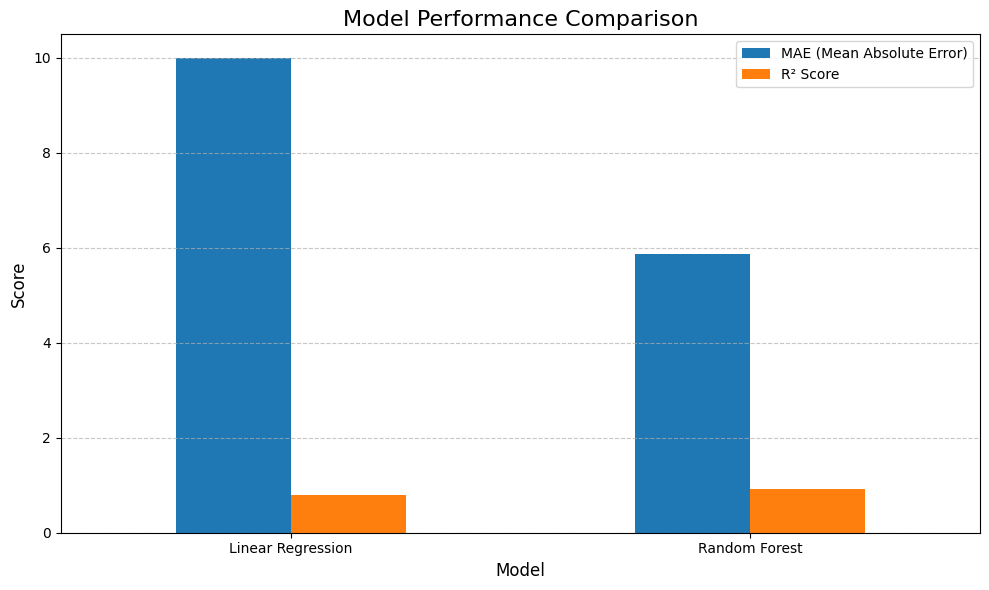

In [29]:
# Plot the performance comparison of models
# Set the "Model" column as the index and plot MAE and R² Score as a bar chart
performance_df.set_index("Model")[["MAE (Mean Absolute Error)", "R² Score"]].plot(kind="bar", figsize=(10, 6))

# Add title and labels to the plot
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)

# Adjust the x-axis labels for better readability
plt.xticks(rotation=0, fontsize=10)

# Add a grid for better visualization
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Optimize the layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()